## Aplicativo que coleta dados de fundos imobiliários na internet!

### Coletando arquivo .csv do site da b3

Importanto das bibliotecas necessárias

In [25]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import matplotlib.pyplot as plt
import time
import os
from sqlalchemy import create_engine 


Definindo o caminho da pasta que o download vai o nome do arquivo que será salvo

In [2]:
base_dir = os.getcwd()
download_dir = os.path.join(base_dir, "../bases_originais")

Verificando se já existe um arquivo com o nome que iremos baixar na pasta, se tiver, excluir

In [3]:
if not os.path.exists(download_dir):
    os.makedirs(download_dir)

download_archive_name = os.path.join(download_dir, "statusinvest-busca-avancada.csv")

if os.path.exists(download_archive_name):
    os.remove(download_archive_name)
print(download_archive_name)


c:\Users\enzot\OneDrive\Documentos\Dev\Impacta\Web Data App\AP1\Scripts\../bases_originais\statusinvest-busca-avancada.csv


Configurando as opções do navegador google chrome

In [4]:
# Configurando as opções do Chrome
chrome_options = Options()
# Configurando as preferências para definir a pasta de download
prefs = {
    "download.default_directory": os.path.abspath(download_dir),  # Diretório de download
    "download.prompt_for_download": False,       # Não perguntar onde salvar o arquivo
    "directory_upgrade": True,                   # Atualizar o diretório de download, se necessário
    "safebrowsing.enabled": True,                # Ignorar avisos de arquivos inseguros        
}
chrome_options.add_experimental_option("prefs", prefs)

Abrir chrome com as configurações selecionadas

In [5]:
navegador = webdriver.Chrome(options=chrome_options)

Abrir o site da b3

In [6]:
navegador.get("https://statusinvest.com.br/fundos-imobiliarios/busca-avancada")

Baixar o arquivo CSV (já salvando no caminho escolhido anteriormente)

In [7]:
navegador.find_element(By.XPATH, '/html/body/main/div[3]/div/div/div/button[2]').click()


In [8]:
try:
    time.sleep(5)
    navegador.find_element(By.XPATH, '/html/body/div[20]/div/div/div[1]/button/i').click()
except:
    print('Não apareceu propaganda')

Não apareceu propaganda


In [9]:
navegador.find_element(By.XPATH, '/html/body/main/div[4]/div/div[1]/div[2]/a/span').click()

In [10]:
navegador.get("https://statusinvest.com.br/indices")

In [11]:
cdi = navegador.find_element(By.XPATH, '/html/body/main/div[2]/div/div/div/table/tbody/tr[4]/td[2]').text
ifixS = navegador.find_element(By.XPATH, '/html/body/main/div[4]/div/div/div/table/tbody/tr[2]/td[2]/div/span').text

### Criando dataframe com o arquivo csv
Importando bibliotecas

In [12]:
import pandas as pd
import numpy as np

Lendo o csv, separado por ; usando o encoding latin1(diferente do utf-8), ignorando a primeira linha (cabeçalho que estava com configurações diferentes do padrão do documento csv)

In [13]:
if os.path.exists(download_archive_name):
    df = pd.read_csv('../bases_originais/statusinvest-busca-avancada.csv', sep=";",)
else:
   time.sleep(5)
   df = pd.read_csv('../bases_originais/statusinvest-busca-avancada.csv', sep=";")
df.head()

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,"77,64","0,700000","9,02","106,92","0,73","56.281,57","1,83","1,47","8,44","503.496.718,25","15.558,00",Passiva,"4.709.082,00"
1,AFHI11,"93,61","0,930000","12,22","94,88","0,99","1.116.628,33","4,69","-8,71","0,06","432.224.228,96","42.539,00",Ativa,"4.555.618,00"
2,AIEC11,"42,50","0,620000","20,42","84,94","0,50","649.174,57","4,35","-1,13","-13,75","409.856.001,38","18.874,00",Ativa,"4.824.987,00"
3,AJFI11,"7,27","0,070000","11,58","12,25","0,59","469.095,52","5,40",NaN,NaN,"387.514.867,40","13.191,00",Ativa,"31.625.978,00"
4,ALMI11,"575,00","5,000000","2,48","2.172,28","0,26","23.137,29","4,28",NaN,"-16,87","241.507.669,88","2.092,00",Passiva,"111.177,00"


## Tratando a base

In [14]:
import matplotlib.pyplot as plt

In [15]:
dfnovo = df

In [16]:
dfnovo['PRECO'] = df['PRECO'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['ULTIMO DIVIDENDO'] = df['ULTIMO DIVIDENDO'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['DY'] = df['DY'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['VALOR PATRIMONIAL COTA'] = df['VALOR PATRIMONIAL COTA'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['P/VP'] = df['P/VP'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['LIQUIDEZ MEDIA DIARIA'] = df['LIQUIDEZ MEDIA DIARIA'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['PERCENTUAL EM CAIXA'] = df['PERCENTUAL EM CAIXA'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['CAGR DIVIDENDOS 3 ANOS'] = df['CAGR DIVIDENDOS 3 ANOS'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo[' CAGR VALOR CORA 3 ANOS'] = df[' CAGR VALOR CORA 3 ANOS'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['PATRIMONIO'] = df['PATRIMONIO'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo['N COTISTAS'] = df['N COTISTAS'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
dfnovo[' N COTAS'] = df[' N COTAS'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)


In [17]:
dfnovo.head()

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,77.64,0.70,9.02,106.92,0.73,56281.57,1.83,1.47,8.44,5.034967e+08,15558.0,Passiva,4709082.0
1,AFHI11,93.61,0.93,12.22,94.88,0.99,1116628.33,4.69,-8.71,0.06,4.322242e+08,42539.0,Ativa,4555618.0
2,AIEC11,42.50,0.62,20.42,84.94,0.50,649174.57,4.35,-1.13,-13.75,4.098560e+08,18874.0,Ativa,4824987.0
3,AJFI11,7.27,0.07,11.58,12.25,0.59,469095.52,5.40,NaN,NaN,3.875149e+08,13191.0,Ativa,31625978.0
4,ALMI11,575.00,5.00,2.48,2172.28,0.26,23137.29,4.28,NaN,-16.87,2.415077e+08,2092.0,Passiva,111177.0


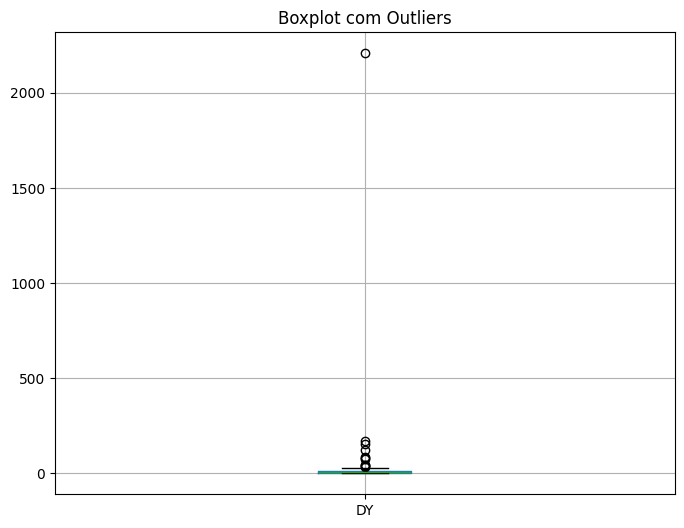

In [18]:
plt.figure(figsize=(8, 6))
dfnovo.boxplot(column=['DY'])
plt.title("Boxplot com Outliers")
plt.show()


In [ ]:
dfnovo.rename(columns={"P/VP": "PVP", "N COTISTAS": "NCOTISTAS", 
                   "CAGR DIVIDENDOS 3 ANOS": "CAGRDIV", 
                   "LIQUIDEZ MEDIA DIARIA": "LIQD",
                   "ULTIMO DIVIDENDO": "ULTDIV", 'VALOR PATRIMONIAL COTA': 'VPC',' CAGR VALOR CORA 3 ANOS': 'CAGRVLR', 'PERCENTUAL EM CAIXA': 'CAIXA', ' N COTAS': 'NCOTA'}, inplace=True)


,TICKER,PRECO,ULTDIV,DY,VPC,PVP,LIQD,CAIXA,CAGRDIV,CAGRVLR,PATRIMONIO,NCOTISTAS,GESTAO,NCOTA
0,ABCP11,77.64,0.70,9.02,106.92,0.73,56281.57,1.83,1.47,8.44,5.034967e+08,15558.0,Passiva,4709082.0
1,AFHI11,93.61,0.93,12.22,94.88,0.99,1116628.33,4.69,-8.71,0.06,4.322242e+08,42539.0,Ativa,4555618.0
2,AIEC11,42.50,0.62,20.42,84.94,0.50,649174.57,4.35,-1.13,-13.75,4.098560e+08,18874.0,Ativa,4824987.0
3,AJFI11,7.27,0.07,11.58,12.25,0.59,469095.52,5.40,NaN,NaN,3.875149e+08,13191.0,Ativa,31625978.0
4,ALMI11,575.00,5.00,2.48,2172.28,0.26,23137.29,4.28,NaN,-16.87,2.415077e+08,2092.0,Passiva,111177.0


In [28]:
engine = create_engine('sqlite:///../bases_tratadas/banco_fiis.db', echo=True)
dfnovo.to_sql('fiis', con=engine, if_exists='replace', index=False)  
dfnovo.to_csv('../bases_tratadas/fiis.csv', encoding='utf-8', sep=';', index=False)
dfnovo.head()

2024-11-21 18:56:14,972 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-21 18:56:14,980 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("fiis")
2024-11-21 18:56:14,980 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-21 18:56:14,984 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("fiis")
2024-11-21 18:56:14,985 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-21 18:56:14,989 INFO sqlalchemy.engine.Engine 
CREATE TABLE fiis (
	"TICKER" TEXT, 
	"PRECO" FLOAT, 
	"ULTDIV" FLOAT, 
	"DY" FLOAT, 
	"VPC" FLOAT, 
	"PVP" FLOAT, 
	"LIQD" FLOAT, 
	"CAIXA" FLOAT, 
	"CAGRDIV" FLOAT, 
	"CAGRVLR" FLOAT, 
	"PATRIMONIO" FLOAT, 
	"NCOTISTAS" FLOAT, 
	"GESTAO" TEXT, 
	"NCOTA" FLOAT
)


2024-11-21 18:56:14,990 INFO sqlalchemy.engine.Engine [no key 0.00119s] ()
2024-11-21 18:56:15,024 INFO sqlalchemy.engine.Engine INSERT INTO fiis ("TICKER", "PRECO", "ULTDIV", "DY", "VPC", "PVP", "LIQD", "CAIXA", "CAGRDIV", "CAGRVLR", "PATRIMONIO", "NCOTISTAS", "GESTAO", "NCOTA") VALUES (?, ?, ?, ?, ?, 

,TICKER,PRECO,ULTDIV,DY,VPC,PVP,LIQD,CAIXA,CAGRDIV,CAGRVLR,PATRIMONIO,NCOTISTAS,GESTAO,NCOTA
0,ABCP11,77.64,0.70,9.02,106.92,0.73,56281.57,1.83,1.47,8.44,5.034967e+08,15558.0,Passiva,4709082.0
1,AFHI11,93.61,0.93,12.22,94.88,0.99,1116628.33,4.69,-8.71,0.06,4.322242e+08,42539.0,Ativa,4555618.0
2,AIEC11,42.50,0.62,20.42,84.94,0.50,649174.57,4.35,-1.13,-13.75,4.098560e+08,18874.0,Ativa,4824987.0
3,AJFI11,7.27,0.07,11.58,12.25,0.59,469095.52,5.40,NaN,NaN,3.875149e+08,13191.0,Ativa,31625978.0
4,ALMI11,575.00,5.00,2.48,2172.28,0.26,23137.29,4.28,NaN,-16.87,2.415077e+08,2092.0,Passiva,111177.0


In [ ]:
listaifix = [ifixS]
listacdi = [cdi]

dicindex = {'ifix': listaifix, 'CDI': listacdi}
dfindex = pd.DataFrame(dicindex)
dfindex['ifix'] = dfindex['ifix'].str.replace(' pts', '').str.replace('.', '').str.replace(',', '.').astype(float)
dfindex['CDI'] = dfindex['CDI'].str.replace(',', '.').str.replace('%', '').astype(float)


In [29]:
dfindex.to_sql('indices', con=engine, if_exists='replace', index=False)
dfindex.to_csv('../bases_tratadas/indice.csv', sep=';', index=False)


2024-11-21 18:57:58,516 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-11-21 18:57:58,518 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("indices")
2024-11-21 18:57:58,520 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-21 18:57:58,523 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("indices")
2024-11-21 18:57:58,525 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-11-21 18:57:58,528 INFO sqlalchemy.engine.Engine 
CREATE TABLE indices (
	ifix FLOAT, 
	"CDI" FLOAT
)


2024-11-21 18:57:58,530 INFO sqlalchemy.engine.Engine [no key 0.00152s] ()
2024-11-21 18:57:58,542 INFO sqlalchemy.engine.Engine INSERT INTO indices (ifix, "CDI") VALUES (?, ?)
2024-11-21 18:57:58,543 INFO sqlalchemy.engine.Engine [generated in 0.00159s] (3166.0, 10.971)
2024-11-21 18:57:58,546 INFO sqlalchemy.engine.Engine COMMIT
